### 분류(classification) 모델
* Decision Tree
* Logistic Regression
* Naive Bayes
* Supprot Vector Machine
* Nearest Neighbor(최소 근접 알고리즘)

### 결정 트리(Decision Tree)
#### 의사 결정 트리 , 의사 결정 나무라고도 함, 대표적인 분류 학습 모델, 회귀도 가능, 스무고개와 유사
#### 나무를 거꾸로 뒤집어 놓은 모양 : 루트노드 --> 규칙노드(중간 노드) --> 리프노드(끝노드)

#### [1] 불순도(Impurity) : 해당 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지를 듯한다, 불확실성,무질서도
#### [2] 엔트로피(Entropy) :  불순도를 수치적으로 나타낸 척도,  엔트로피가 높다는 것은 불순도가 높다.
####                                   엔트로피가 1이면 불순도 최대     
#### [3] 정보 이득(infomation gain) : 1 - 엔트로피
###### - 결정트리는 구분 뒤 각 영역의 순도가 증가, 불순도는 감소하는 방향으로 학습을 진행, 정보이론에 정보 이득이하고함
#### [4] 지니계수(Gini Coefficent): 1 - (각 범주별 데이터의 비율의 제곱의 합), 0 이면 최소(끝노드), 1 이면 최대

In [1]:
### Iris(붓꽃) 품종 예측하기

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# iris의 품종 :  [0:'setosa', 1:'versicolor', 2:'virginica']
# 붓꽃 데이터 세트를 로딩
iris = load_iris()
type(iris)  # Bunch 타입

# x 피쳐만 추출
iris_data = iris.data
# print(iris_data)

# y 답(label)만 추출
iris_label = iris.target
iris_label
print(iris.target_names)  # ['setosa' 'versicolor' 'virginica']

# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
#  sepal : 꽃받침,  petal : 꽃잎  
print(iris.feature_names) 

iris_df = pd.DataFrame(data=iris_data,columns=iris.feature_names)
iris_df['label'] = iris_label  # y(답) 값으로 구성된 'label' 컬럼을 데이터 프레임에 추가
iris_df['label'].value_counts()  # 50,50,50
iris_df # (150,5)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
# train(학습) 데이터와 test(검증) 데이터 세트로 분리 :  80%:20%비율, 120개(train), 30개(test)
X_train,X_test,y_train,y_test = train_test_split(iris_data,iris_label,test_size=0.2,
                                            random_state=11) # random seed 고정,동일한데이터추출
X_train.shape,X_test.shape,y_train.shape,y_test.shape
# ((120, 4), (30, 4), (120,), (30,))

((120, 4), (30, 4), (120,), (30,))

In [5]:
# 학습(Train) 수행
dt_clf = DecisionTreeClassifier(random_state=11) # seed 고정, 동일한 학습

dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

In [6]:
# 예측(predict) 수행
pred = dt_clf.predict(X_test)
pred,y_test

(array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
        0, 1, 0, 0, 2, 1, 0, 1]),
 array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
        0, 1, 0, 0, 2, 1, 0, 1]))

In [7]:
# 정확도 측정 : accuracy
from sklearn.metrics import accuracy_score,classification_report

print('정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))  # 0.9333

# cl_report = classification_report(y_test,pred)
# print('리포트:\n',cl_report)

정확도: 0.9333


### 결정 트리 모델의 시각화 : 학습 과정을 시각화함

In [8]:
# train(학습) 데이터와 test(검증) 데이터 세트로 분리 :  80%:20%비율, 120개(train), 30개(test)
X_train,X_test,y_train,y_test = train_test_split(iris_data,iris_label,test_size=0.2,
                                            random_state=11) # random seed 고정,동일한데이터추출
X_train.shape,X_test.shape,y_train.shape,y_test.shape
# ((120, 4), (30, 4), (120,), (30,))

# 학습(Train) 수행
dt_clf = DecisionTreeClassifier(random_state=11) # seed 고정, 동일한 학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

In [18]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot', class_names= iris.target_names,
               feature_names=iris.feature_names,impurity=True, filled=True)

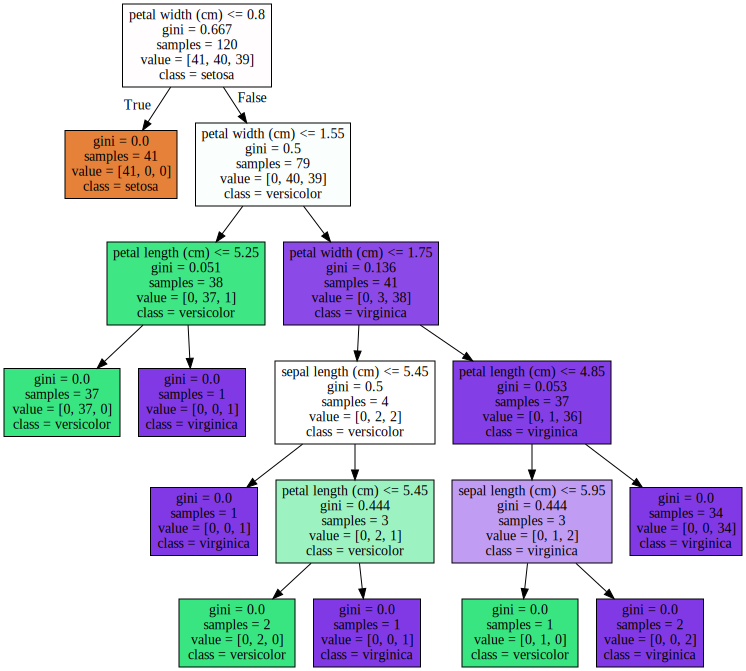

In [19]:
import graphviz

f = open('tree.dot')
dot_graph = f.read()
graphviz.Source(dot_graph)


In [22]:
# 지니계수 : 1 - (각 범주별 데이터의 비율의 제곱의 합) , 0 이면 leaf node

# gini = 0.667
# samples = 120
# value = [41, 40, 39]
# class = setosa
gini = 1 - ((41/120)**2 + (40/120)**2 + (39/120)**2)
print(gini)   # 0.6665277777777778


# gini = 0.5
# samples = 79
# value = [0, 40, 39]
# class = versicolor
gini = 1 - ((0/79)**2 + (40/79)**2 + (39/79)**2)
print(gini)  # 0.4999198846338727

0.6665277777777778
0.4999198846338727


Feature importance:
[0.025 0.    0.049 0.926]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.049
petal width (cm) : 0.926


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
label,0.782561,-0.426658,0.949035,0.956547,1.000000


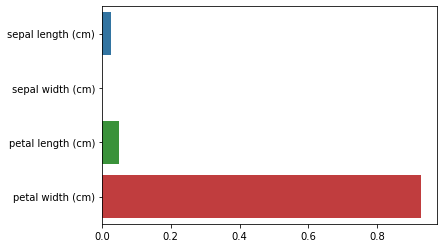

In [38]:
# feature importance : 결정트리의 규칙노드가 분기 조건으로 사용할 피처의 우선 순위에 사용
import seaborn as sns
print('Feature importance:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))

sns.barplot(x = dt_clf.feature_importances_,y=iris.feature_names)
iris_df.corr()   # 상관 관계와 다름

### 내부 알고리즘 처리 과정 분석

In [58]:
### GINI 계수 함수 구현
import numpy as np

def gini(value):
    array_of_values = np.array(value)
    array_of_sum = array_of_values.sum()
    squared_sum = 0
    for value in array_of_values:
        squared_sum += (value/array_of_sum)**2
    return round(1 - squared_sum,3)            
    
print(gini([41, 40, 39]))
print(gini([0, 3, 38]))
print(gini([0,0,10]))

0.667
0.136
0.0


In [54]:
# 1 번 노드 : 루트 노드, 규칙 노드
# petal width (cm) <= 0.8
# gini = 0.667
# samples = 120
# value = [41, 40, 39]
# class = setosa

first_df = pd.DataFrame(data=X_train, columns=iris.feature_names)
first_df['label'] = y_train
first_df  # (120,5)

print(first_df['label'].value_counts())  # [41, 40, 39]
print(gini([41, 40, 39]))   #  gini = 0.667 , 지니 계수가 크므로 자식노드(2번과 3번) 브랜치

# 자식 노드 생성
second_node = first_df[firstthird_node_df['petal width (cm)'] <= 0.8] # 자식 노드 (2번노드)생성
third_node = first_df[first_df['petal width (cm)'] > 0.8]   # 자식 노드 (3번노드)생성

0    41
1    40
2    39
Name: label, dtype: int64
0.667


(79, 5)

In [63]:
# 2번 노드 : 첫번째 터미널 노드, 리프 노드
# gini = 0.0
# samples = 41
# value = [41, 0, 0]
# class = setosa
print(second_node['label'].value_counts())
print('gini:',gini([41, 0, 0]))      # gini: 0.0
print('class:',iris.target_names[0])  # 'setosa'

gini: 0.0
class: setosa


In [69]:
# 3번 노드 : 규칙 노드
# petal width (cm) <= 1.55
# gini = 0.5
# samples = 79
# value = [0, 40, 39]
# class = versicolor
print(third_node['label'].value_counts())
print('gini:',gini([0, 40, 39]))      # gini: 0.5, 지니 계수가 크므로 자식노드(4번과 5번) 브랜치

# 자식 노드 생성
fourth_node = third_node[third_node['petal width (cm)'] <= 1.55] # 자식 노드 (4번노드)생성
fithd_node = third_node[third_node['petal width (cm)'] > 1.55]   # 자식 노드 (5번노드)생성

1    40
2    39
Name: label, dtype: int64
gini: 0.5
